In [1]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import rasterstats
import pandas as pd
import os
import numpy as np

In [2]:
district_data=gpd.read_file('Nepal Shapefile\hermes_NPL_new_wgs_2.shp')


###### Extracting kaski and Palpa

In [3]:
district_data.loc[52]

OBJECTID                                                   53
PROVINCE                                                    5
PR_NAME                                         Province No 5
DISTRICT                                                Palpa
geometry    POLYGON ((83.38029826665172 27.957742581854745...
Name: 52, dtype: object

In [4]:
kaski_data=pd.DataFrame(district_data.loc[37]).T

In [5]:
kaski_raindata=gpd.GeoDataFrame(kaski_data)

In [6]:
type(kaski_raindata)

geopandas.geodataframe.GeoDataFrame

In [41]:
#kaski_raindata.plot()

In [8]:
kaski_raindata.crs=district_data.crs

In [9]:
palpa_data=pd.DataFrame(district_data.loc[52]).T

In [10]:
palpa_raindata=gpd.GeoDataFrame(palpa_data)

In [11]:
palpa_raindata.crs=district_data.crs

###### Creating empty DataFrame

In [12]:
data=pd.DataFrame('',columns=['Date','Average_rainfall_kaski','Average_rainfall_palpa'],index=np.arange(1,124))

In [13]:
data.loc[2]['Date']=34

In [14]:
pd.options.display.max_rows = 9999

In [15]:
data.loc[3]['Average_rainfall_kaski']=55

In [16]:
data['Average_rainfall_kaski'][3]

55

###### Reading the information from the rainfall data

In [17]:
i=0

In [24]:
for raster in os.listdir('Rainfall Data'):
    if raster[-4:]=='.tif':
        rf=rasterio.open('Rainfall Data'+'\\' + raster)
        rainfall_array=rf.read(1)
        affine=rf.transform
        #Zonal statistics
        #kaski
        average_rf_kaski=rasterstats.zonal_stats(kaski_raindata,rainfall_array,affine=affine,
                                   stats=['mean'],
                                   geojson_out=True)
        average_rf_kaski=average_rf_kaski[0]['properties']['mean']
        #palpa
        average_rf_palpa=rasterstats.zonal_stats(palpa_raindata,rainfall_array,affine=affine,
                                   stats=['mean'],
                                   geojson_out=True)
        average_rf_palpa=average_rf_palpa[0]['properties']['mean']
        data.loc[i]['Date']=raster[:-4]
        data['Average_rainfall_kaski'].loc[i]=average_rf_kaski
        data['Average_rainfall_palpa'].loc[i]=average_rf_palpa
        i=i+1
        
        
        

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\rasterstats\io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to

In [26]:
data['Date']=pd.to_datetime(data['Date'],infer_datetime_format=True)
data['Date']=data['Date'].dt.date
data=data.sort_values(by='Date')

In [27]:
data

,Date,Average_rainfall_kaski,Average_rainfall_palpa
1,2021-04-28,0.0,0.0
2,2021-04-29,12.759044,11.013273
3,2021-04-30,0.244194,0.303557
4,2021-05-01,23.953404,11.031315
5,2021-05-02,3.982662,0.0
6,2021-05-03,13.869848,6.749874
7,2021-05-04,7.276263,11.383329
8,2021-05-05,0.464795,5.012248
9,2021-05-06,0.086758,1.977922
10,2021-05-07,35.189656,17.090922


###### Creating Plots

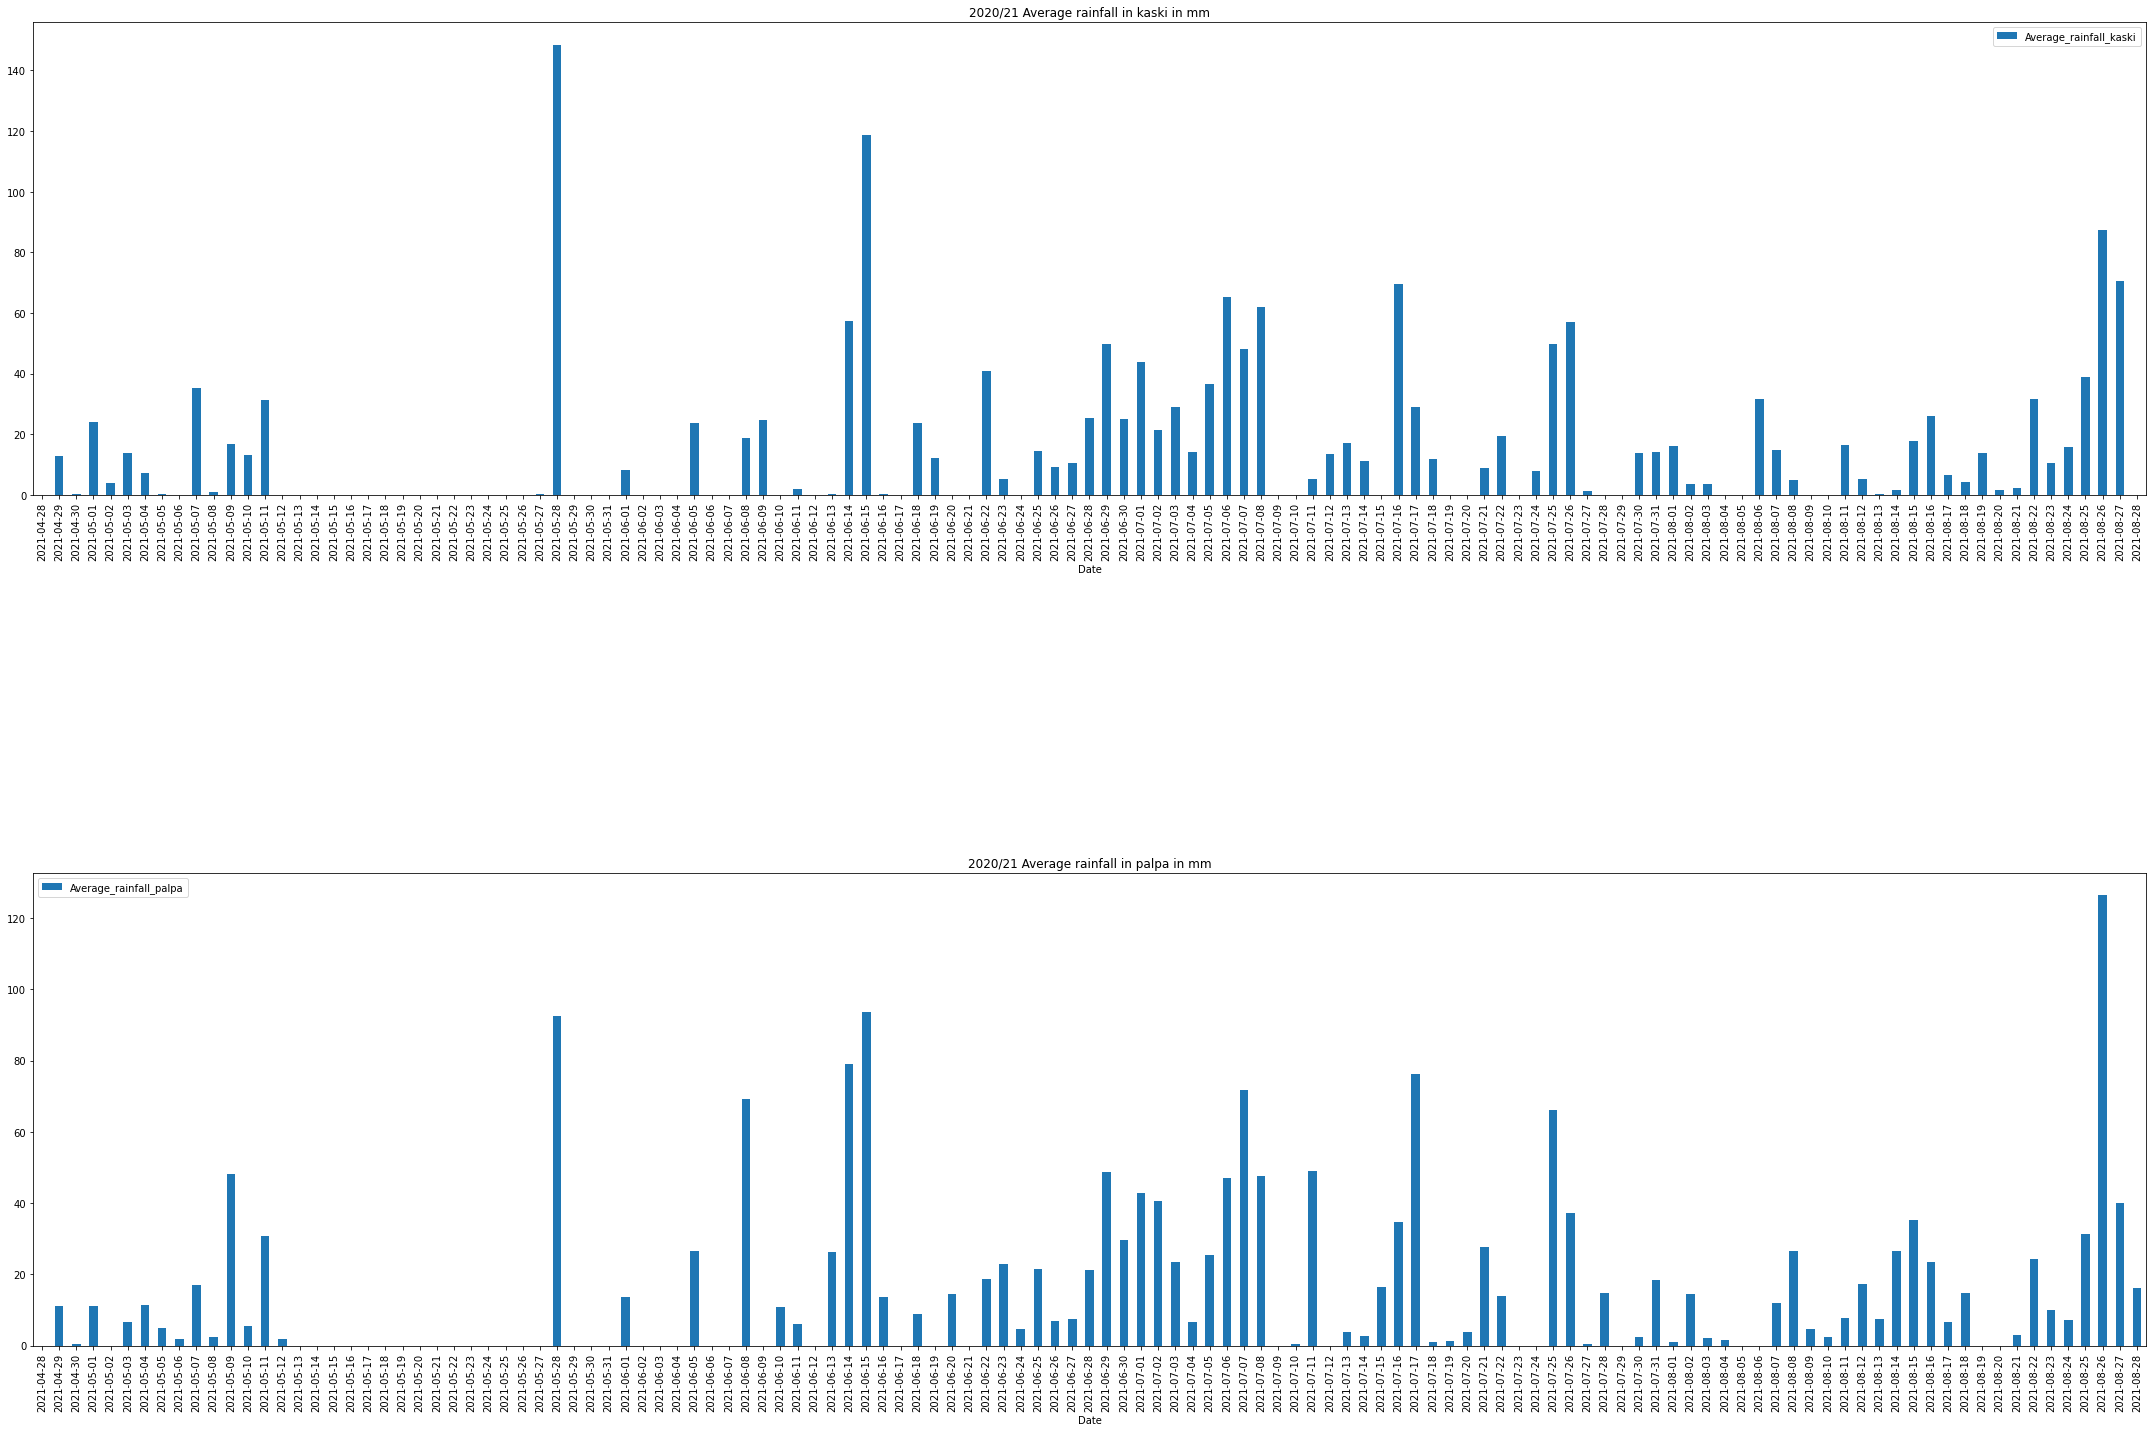

<Figure size 432x288 with 0 Axes>

In [43]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(30,20))
data.plot(x='Date',y='Average_rainfall_kaski',kind='bar',ax=ax1,title='2020/21 Average rainfall in kaski in mm')
data.plot(x='Date',y='Average_rainfall_palpa',kind='bar',ax=ax2,title='2020/21 Average rainfall in palpa in mm')
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()
plt.savefig('Data.jpg')